# Periodic Task Schedling: Deadline Monotnic
DM is an extension of Rate Monotonic, where tasks can have relative deadlines less than or equal to their period
<br>
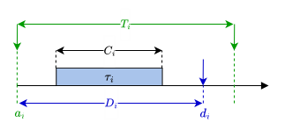
<br>
According to the DM algorithm, each task is assigned a fixed- priority  inversely proportional to its relative deadline  .
Thus, at any instant, the task with the shortest relative deadline is executed.
Since relative deadlines are constant, DM is a static priority assignment.

Optimal i.e. a set of tasks is schedulable with fixed priority algo A => is schedulable with DM<br>
## Sufficient criteria for schedulability 1
simple but a little pessimistic
$$\sum_{i=1}^n{\frac{C_i}{D_i}-1}<=n(2^{\frac{1}{n}}-1)$$

## Example

In [1]:
import pandas as pd
from   IPython.display import display, Markdown
import rate_monotonic as rtm

task_set = [
        rtm.Task(period=8,  deadline=4 ,execution_time=2),
        rtm.Task(period=14, deadline=10,execution_time=5),
        rtm.Task(period=24, deadline=12,execution_time=6)
    ]
task_matrix = [[row.period,row.deadline,row.execution_time] for row in task_set]
display(pd.DataFrame(task_matrix, columns=['Period', 'Deadline', 'Execution Time']))


,Period,Deadline,Execution Time
0,8,4,2
1,14,10,5
2,24,12,6


In [2]:
# Check schedulability
schedulable = rtm.rate_monotonic_check(task_set, verbose=True)
if schedulable:
    print("The task set is schedulable under Rate Monotonic scheduling.")

Rate Monotonic Schedulability Analysis


,Task,Execution Time (C),Period (T),Deadline (D),Utilization (C/T)
0,T1,2,8,4,0.500
1,T2,5,14,10,0.500
2,T3,6,24,12,0.500



Summary:


,Metric,Value
0,Number of Tasks,3
1,Total Utilization,1.500
2,RM Bound,0.780
3,Schedulable,✗ No


## Example 2

In [3]:
task_set = [
        rtm.Task(period= 8,  deadline=6 ,execution_time=1),
        rtm.Task(period=14, deadline=12,execution_time=5),
        rtm.Task(period=24, deadline=24,execution_time=6)
    ]
task_matrix = [[row.period,row.deadline,row.execution_time] for row in task_set]
display(pd.DataFrame(task_matrix, columns=['Period', 'Deadline', 'Execution Time']))
# Check schedulability
schedulable = rtm.rate_monotonic_check(task_set, verbose=True)
if schedulable:
    print("The task set is schedulable under Rate Monotonic scheduling.")

,Period,Deadline,Execution Time
0,8,6,1
1,14,12,5
2,24,24,6


Rate Monotonic Schedulability Analysis


,Task,Execution Time (C),Period (T),Deadline (D),Utilization (C/T)
0,T1,1,8,6,0.167
1,T2,5,14,12,0.417
2,T3,6,24,24,0.250



Summary:


,Metric,Value
0,Number of Tasks,3
1,Total Utilization,0.833
2,RM Bound,0.780
3,Schedulable,✗ No


## Sufficient criteria for schedulability 2
A little less pessimistic
$$R_i\equiv C_i + I_i = C_i + \sum_{h=1}^{i-1}{\lceil{\frac{D_i}{T_h}}\rceil C_h } <= D_i$$

In [4]:
# Check schedulability
schedulable = rtm.rate_monotonic_check_1(task_set, verbose=True)
if schedulable:
    print("The task set is schedulable under Rate Monotonic scheduling.")


DEADLINE-BASED RESPONSE TIME ANALYSIS
Formula: R_i = C_i + Σ(h=1 to i-1) ⌈D_i/T_h⌉ × C_h


,Task,Period (T),Execution (C),Deadline (D),Utilization,Interference (I),Response Time (R),R ≤ D
0,T1,8,1,6,0.125,0.0,1.0,✓
1,T2,14,5,12,0.357,2.0,7.0,✓
2,T3,24,6,24,0.250,13.0,19.0,✓



Interference Calculation Details:
------------------------------------------------------------
Task T2: I = ⌈12/8⌉×1=2.0
Task T3: I = ⌈24/8⌉×1=3.0 + ⌈24/14⌉×5=10.0

SUMMARY:
Total Utilization: 0.732
Schedulable Tasks: 3/3
Overall Status: SCHEDULABLE
The task set is schedulable under Rate Monotonic scheduling.


## Necessary and sufficient: response times criteria

$$R_i\equiv C_i + I_i = C_i + \sum_{h=1}^{i-1}{\lceil{\frac{R_i}{T_h}}\rceil C_h } <= D_i$$

In [5]:
sorted_tasks = sorted(task_set, key=lambda x: x.period)
schedulable, response_times = rtm.response_time_analysis(task_set)
rtm.display_response_time_table(task_set,response_times,schedulable)


RESPONSE TIME ANALYSIS RESULTS
Task  Period (T)  Execution (C)  Deadline (D) Utilization Response Time (R) R ≤ D      Status
  T1           8              1             6       0.167               1.0     ✓ Schedulable
  T2          14              5            12       0.417               6.0     ✓ Schedulable
  T3          24              6            24       0.250              13.0     ✓ Schedulable

SUMMARY:
Total Utilization: 0.732
Schedulable Tasks: 3/3
Overall Status: SCHEDULABLE
